In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install yellowbrick

Task 1: Exploratory Data Analysis and Visualization

In [3]:
df = pd.read_csv("C:\\Users\\maryp\\Downloads\winequality-red.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:title={'center':'Count of Class'}>

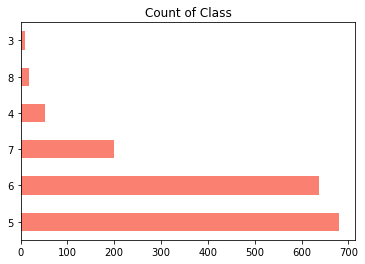

In [5]:
df.quality.value_counts().plot(kind='barh', title='Count of Class', color='salmon')

In [6]:
def sea_plot1(X,Y, label='Classes'):
    sns.scatterplot(X['alcohol'], X['chlorides'], 
    hue=Y['quality'], palette=c)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


In [7]:
def sea_plot2(X,Y, label='Classes'):
    sns.scatterplot(X['pH'], X['volatile acidity'], 
    hue=Y['quality'], palette=c1)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


In [8]:
c = sns.color_palette('Set2',6)
c1 = sns.color_palette('cool',6)

Task 2: Applying Undersampling Strategies

In [9]:
X = df.iloc[:, 0:11].copy() #copy to ensure original dataset isn't affected
Y = df.iloc[:, 11:].copy()
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [10]:
! pip install imblearn

Classifiers learn better from a balnced distribution

It is up to us to correct the imbalance, which can be done in multiple ways.
Let's discuss three different types of imbalance.
One off them is a within class imbalance, occurs when
dataset has balance between class. But one of the classes it not is not representative in some regions.

Similarly, an intrinsic balance is due to the nature of the dataset, while extrinsic imbalance is related to time storage and other factors that limited dataset or the data analysis.

And third class is between class imbalance, which occurs when there is an imbalance in the number of data points contained within each class.
This thrid class is what we're dealing with here.

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


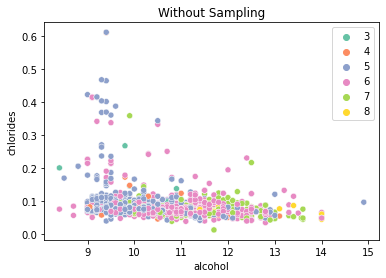

In [11]:
sea_plot1(X,Y, 'Without Sampling')

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


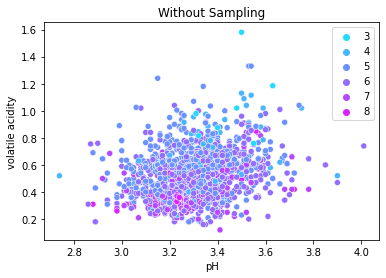

In [12]:
sea_plot2(X,Y, 'Without Sampling')

In [13]:
from imblearn.under_sampling import RandomUnderSampler

ran = RandomUnderSampler()
x_ran, y_ran = ran.fit_resample(X,Y)

y_ran.quality.value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

This random under sampler reduced all of our classes to 10 point for each class, which is not of any use to us.

Random undersampler is a fast and easy way to balance the data by randomly selecting a subset of data from the target class.

Undersampling strategy is used to reduce the majority class by randomly picking samples, with or without replacement.

In [14]:
from imblearn.under_sampling import TomekLinks
tm = TomekLinks(sampling_strategy='all')
x_tm, y_tm = tm.fit_resample(X,Y)

y_tm.quality.value_counts()

5    589
6    533
7    166
4     32
8     10
3      5
Name: quality, dtype: int64

Tomeklinks reduced all the three of the majority
class, initially in our dataset, we have around 681, 630
and 199 at a points for the majority classes and resembling all strategy, reduce all off the three classes.

Tomeklinks are pairs of very close distances but of
opposing classes, they remove the instances of the
majority class of each pair which increases the space between the two classes, facilitating the classification process, therefore, creating a better decision boundary.

Tomeklinks exist if the two samples are the nearest neighbor of each other, and they are of different class, define sampling strategy for tomeklinks.

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


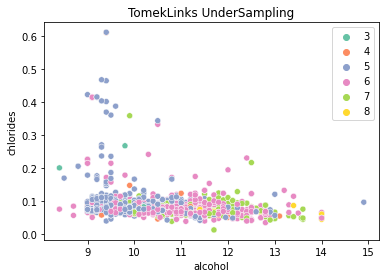

In [15]:
sea_plot1(x_tm, y_tm, 'TomekLinks UnderSampling')

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


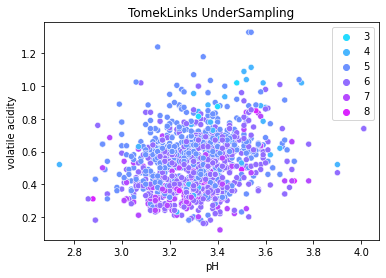

In [16]:
sea_plot2(x_tm, y_tm, 'TomekLinks UnderSampling')

For this particular scenario under sampling is not the best strategy to balance each class, since some of the
targets have extremely few data points and under sampling
will make our data very small thus our model will fail to
capture and relation between the data points.

We will move toward upsampling strategies.

Task 3: Applying Oversampling Strategies: ADASYN, SVMSMOTE

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,Y)

y_sm.quality.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

smote resampled all of our classification targets with respect to the class which have highest number of samples

SMOTE is an over sampling technique that generates
synthetic samples from the minority class.
It's used to obtain a synthetic class balance or near class balance training set, which is then used to train
a classifier.

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


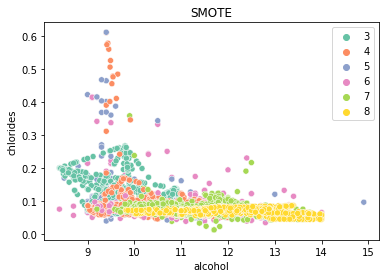

In [18]:
sea_plot1(x_sm, y_sm, 'SMOTE')

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


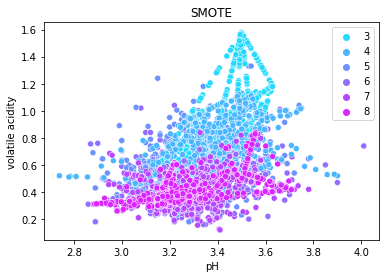

In [19]:
sea_plot2(x_sm, y_sm, 'SMOTE')

In [20]:
from imblearn.over_sampling import SVMSMOTE
svm = SVMSMOTE(sampling_strategy='not majority', k_neighbors=4)
x_svm, y_svm = svm.fit_resample(X,Y)

y_svm.quality.value_counts()

5    681
6    681
7    681
8    422
3    361
4    289
Name: quality, dtype: int64

SVMSmote is a relatively new technique and a newer version of this Smote.
The only difference is that it focuses on generating new minority class instance near borderline with SVM.

So it helps establish boundary between different classes
and select sampling strategy here to 'not majority'.
It's equivalent to sampling all the classes except the one which has the highest samples, this time of four neighbors.

It is a little bit different from smote in that it has created samples for all of our classes but does not create all of them with respect to smote (all of them to the same samples).

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


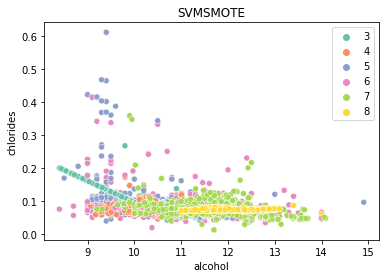

In [21]:
sea_plot1(x_svm, y_svm, 'SVMSMOTE')

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


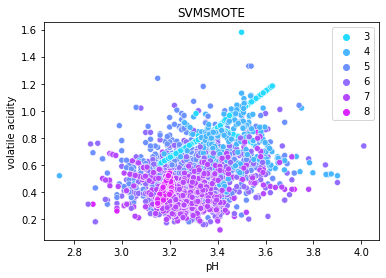

In [22]:
sea_plot2(x_svm, y_svm, 'SVMSMOTE')

Task 4: Combining Over & Under Sampling Strategies: SMOTETomek

We will discuss the newest and very powerful advanced sampling strategy, which is the combination of over and under sampling - SmoteTomek.
This works in a way that smote is applied first
to oversample the minority class to make a balanced
distribution, then examples and tomeklinks from the majority classes are identified and removed.

This combination is used to provide a reduction in false
negative at the cost of an increase in false positive,
especially for a binary classification task.

In [23]:
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(sampling_strategy='all')
x_smtm, y_smtm = smtom.fit_resample(X,Y)

y_smtm.quality.value_counts()

3    675
8    668
7    663
4    662
5    605
6    603
Name: quality, dtype: int64

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


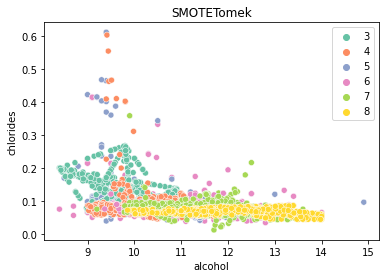

In [24]:
sea_plot1(x_smtm, y_smtm, 'SMOTETomek')

c:\Users\maryp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


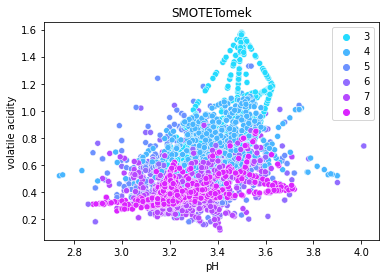

In [25]:
sea_plot2(x_smtm, y_smtm, 'SMOTETomek')

Task 5: Metrics Discussion and Comparison of Impact of Strategies

simpler metrics like accuracy.
Score can be misleading in the data set with highly
unbalanced classic classifier will always predict the most
common class without performing much deeper analysis
off the feature.
And it will have a very high accuracy rate, obviously not
the correct ones, although widely used classification
accuracy almost universally, is inappropriate for imbalanced
classifications, Confusion metrics.
On the other hand, is much better option because confusion
metrics provide more insights and to not only the performance
of a predictive model, but also which classes
are being predicted correctly and which are predicted
incorrectly and more types of errors are being made.

In [26]:
from sklearn.model_selection import train_test_split

train_smx, test_smx, train_smy, test_smy = train_test_split(x_sm, y_sm, test_size=0.20)

train_svmx, test_svmx, train_svmy, test_svmy = train_test_split(x_svm, y_svm, test_size=0.20)

train_smtmx, test_smtmx, train_smtmy, test_smtmy = train_test_split(x_smtm, y_smtm, test_size=0.20)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm

In [28]:
rf = RandomForestClassifier()


In [29]:
########### SMOTE ############

rf.fit(train_smx, train_smy.values.ravel())  #use ravel to covert to vector
y_predsm = rf.predict(test_smx)

In [30]:
cmat_sm = cm(test_smy, y_predsm)
cmat_sm

array([[151,   0,   0,   0,   0,   0],
       [  1, 109,   6,   0,   0,   0],
       [  4,   9,  96,  17,   3,   0],
       [  0,   5,  26,  97,  18,   4],
       [  0,   0,   1,  13, 119,   1],
       [  0,   0,   0,   0,   0, 138]], dtype=int64)

In [31]:
########### SVMSMOTE ############

rf.fit(train_svmx, train_svmy.values.ravel())  #use ravel to covert to vector
y_predsvm = rf.predict(test_svmx)

In [32]:
cmat_svm = cm(test_svmy, y_predsvm)
cmat_svm

array([[ 70,   0,   1,   0,   0,   0],
       [  0,  46,   5,   0,   0,   0],
       [  0,   4, 117,  28,   4,   0],
       [  0,   2,  30,  87,  15,   1],
       [  0,   0,   2,  16, 115,   0],
       [  0,   0,   0,   1,   2,  77]], dtype=int64)

In [33]:
########### SMOTETomek ############

rf.fit(train_smtmx, train_smtmy.values.ravel())  #use ravel to covert to vector
y_predsmtm = rf.predict(test_smtmx)

In [34]:
cmat_smtm = cm(test_smtmy, y_predsmtm)
cmat_smtm

array([[135,   0,   0,   0,   0,   0],
       [  0, 138,   3,   0,   0,   0],
       [  2,  10, 103,  17,   2,   0],
       [  1,   4,  12,  76,  22,   2],
       [  0,   0,   2,   5,  95,   1],
       [  0,   0,   0,   0,   3, 143]], dtype=int64)

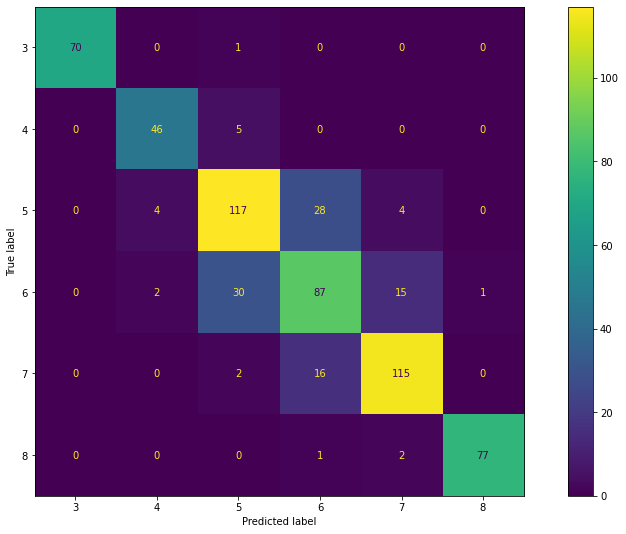

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams['figure.figsize']=[16,9]
cmd = ConfusionMatrixDisplay(cmat_svm, display_labels=['3','4','5','6','7','8'])
cmd.plot()

c:\Users\maryp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


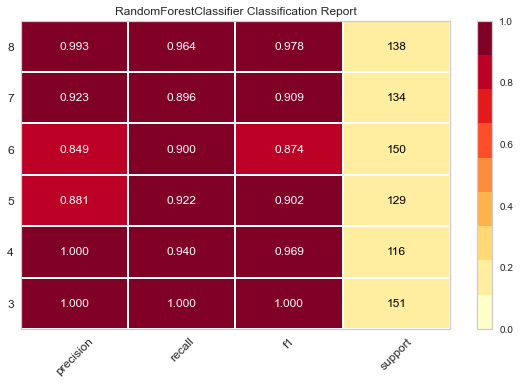

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [36]:
from yellowbrick.classifier import ClassificationReport

clr = ClassificationReport(rf, support=True)
clr.fit(train_smx, train_smy)
clr.score(test_smx, test_smy)
clr.show()

In [37]:
from sklearn.metrics import classification_report

cl1 = classification_report(test_smtmy, y_predsmtm, output_dict = True)
c_rep = pd.DataFrame(cl1).T
c_rep

,precision,recall,f1-score,support
3,0.978261,1.000000,0.989011,135.000000
4,0.907895,0.978723,0.941980,141.000000
5,0.858333,0.768657,0.811024,134.000000
6,0.775510,0.649573,0.706977,117.000000
7,0.778689,0.922330,0.844444,103.000000
8,0.979452,0.979452,0.979452,146.000000
accuracy,0.889175,0.889175,0.889175,0.889175
macro avg,0.879690,0.883122,0.878815,776.000000
weighted avg,0.887931,0.889175,0.886220,776.000000


In [38]:
c_rep1 = c_rep.copy()
c_rep1['support'] = c_rep1.support.apply(int)
c_rep1.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['3':'8',:'recall'])

,precision,recall,f1-score,support
3,0.978261,1.000000,0.989011,135
4,0.907895,0.978723,0.941980,141
5,0.858333,0.768657,0.811024,134
6,0.775510,0.649573,0.706977,117
7,0.778689,0.922330,0.844444,103
8,0.979452,0.979452,0.979452,146
accuracy,0.889175,0.889175,0.889175,0
macro avg,0.879690,0.883122,0.878815,776
weighted avg,0.887931,0.889175,0.886220,776


We see that the model is unable to distinguish between class 5 and 6. Further analysis is needed.